# Predicting Solubility of Molecules using PyCaret 

# 1.0 Import Libraries

In [1]:
import pandas as pd
import numpy as np

from pycaret.regression import*
import shap

# 2.0 Read File

In [2]:
df = pd.read_csv('Descriptors.csv').drop(['Unnamed: 0'], axis=1)
print(df.shape)
df.head()

(1144, 5)


,cLogP,MolWt,Num_RotatableBonds,AP,LogS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


# 3.0 Split Dataset ( 90% for model building + 10% unseen data for testing)

In [3]:
data = df.sample(frac=0.9, random_state = 123)
print(data.shape)
data.head()

(1030, 5)


,cLogP,MolWt,Num_RotatableBonds,AP,LogS
681,5.26898,349.430,5.0,0.461538,-6.025
373,1.84570,360.450,3.0,0.000000,-3.850
541,2.09160,128.215,0.0,0.000000,-1.290
381,1.84560,227.337,5.0,0.400000,-3.040
141,1.02480,88.150,0.0,0.000000,-0.400


In [4]:
data_unseen = df.drop(data.index)
print(data_unseen.shape)
data_unseen.head()

(114, 5)


,cLogP,MolWt,Num_RotatableBonds,AP,LogS
2,2.5938,167.850,1.0,0.000000,-1.74
3,2.0289,133.405,1.0,0.000000,-1.48
8,4.3002,215.894,0.0,0.600000,-4.57
16,3.9741,314.802,0.0,0.666667,-4.50
17,3.6468,181.449,0.0,0.666667,-3.59


In [5]:
data.reset_index(drop=True, inplace=True)
data.head()

,cLogP,MolWt,Num_RotatableBonds,AP,LogS
0,5.26898,349.430,5.0,0.461538,-6.025
1,1.84570,360.450,3.0,0.000000,-3.850
2,2.09160,128.215,0.0,0.000000,-1.290
3,1.84560,227.337,5.0,0.400000,-3.040
4,1.02480,88.150,0.0,0.000000,-0.400


In [6]:
data_unseen.reset_index(drop=True, inplace=True)
data_unseen.head()

,cLogP,MolWt,Num_RotatableBonds,AP,LogS
0,2.5938,167.850,1.0,0.000000,-1.74
1,2.0289,133.405,1.0,0.000000,-1.48
2,4.3002,215.894,0.0,0.600000,-4.57
3,3.9741,314.802,0.0,0.666667,-4.50
4,3.6468,181.449,0.0,0.666667,-3.59


In [7]:
print('Model Building Data:', data.shape)
print('Unseen Data:', data_unseen.shape)

Model Building Data: (1030, 5)
Unseen Data: (114, 5)


# 4.0 PyCaret Model Buiding Workflow

# 4.1 Environment Setup

In [12]:
model_reg = setup(data=data, target = 'LogS', train_size = 0.8, session_id=456)

,Description,Value
0,session_id,456
1,Target,LogS
2,Original Data,"(1030, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(824, 4)"


# 4.2 Compare Models

In [13]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5481,0.5842,0.7609,0.8665,0.2214,0.7457,0.2920
catboost,CatBoost Regressor,0.5661,0.5968,0.7678,0.8633,0.2205,0.7289,1.1190
rf,Random Forest Regressor,0.5576,0.5982,0.7672,0.8625,0.2202,0.7981,0.3140
lightgbm,Light Gradient Boosting Machine,0.5754,0.6204,0.7834,0.8576,0.2221,0.7957,0.0920
gbr,Gradient Boosting Regressor,0.6050,0.6521,0.8027,0.8502,0.2338,0.8105,0.0460
xgboost,Extreme Gradient Boosting,0.5799,0.6704,0.8131,0.8466,0.2363,0.7675,0.3270
ada,AdaBoost Regressor,0.7270,0.8526,0.9212,0.8048,0.2494,0.9441,0.0580
lar,Least Angle Regression,0.7655,1.0169,1.0020,0.7669,0.2872,0.9841,0.0130
br,Bayesian Ridge,0.7662,1.0169,1.0021,0.7669,0.2870,0.9847,0.0160
ridge,Ridge Regression,0.7656,1.0169,1.0020,0.7669,0.2872,0.9842,0.0120


# 4.3 Create Model

In [15]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5447,0.6154,0.7845,0.8666,0.2540,0.7014
1,0.5266,0.5387,0.7339,0.8942,0.2027,0.3198
2,0.5033,0.4466,0.6683,0.8997,0.2185,1.1147
3,0.6301,0.7744,0.8800,0.8593,0.2537,0.6561
4,0.5053,0.4033,0.6351,0.9018,0.1758,0.4257
5,0.5454,0.6026,0.7763,0.8687,0.2444,0.3941
6,0.5658,0.6838,0.8269,0.7777,0.2372,2.7734
7,0.5396,0.4981,0.7058,0.8697,0.1732,0.3536
8,0.5404,0.5851,0.7649,0.8718,0.1998,0.2923
9,0.5798,0.6945,0.8334,0.8551,0.2546,0.4255


# 4.4 Tune Model

In [26]:
tuned_et = tune_model(et, n_iter=50, optimize='mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6068,0.6676,0.8171,0.8553,0.2655,0.7342
1,0.5624,0.5475,0.7399,0.8925,0.1976,0.3199
2,0.5503,0.5007,0.7076,0.8875,0.2034,1.0853
3,0.6958,0.8709,0.9332,0.8418,0.2633,0.6829
4,0.5344,0.4350,0.6595,0.8940,0.1727,0.7462
5,0.5722,0.5428,0.7368,0.8817,0.2159,0.5220
6,0.6151,0.7326,0.8559,0.7618,0.2385,2.5167
7,0.5197,0.4574,0.6763,0.8804,0.1684,0.3303
8,0.5941,0.6099,0.7810,0.8664,0.2048,0.3357
9,0.5717,0.7027,0.8383,0.8534,0.2489,0.4227


# 5.0 Model Analysis

# 5.1 Plot Model 

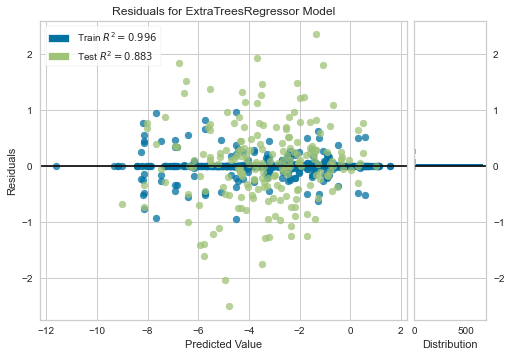

In [32]:
# Residuals Plot

plot_model(et, 'residuals')

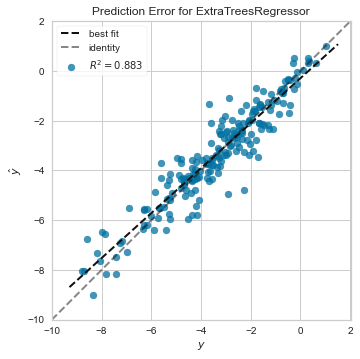

In [37]:
# Error Plot

plot_model(et, 'error')

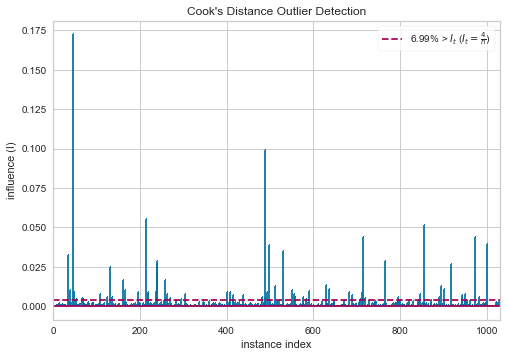

In [38]:
# Cooks distance plot

plot_model(et, 'cooks')

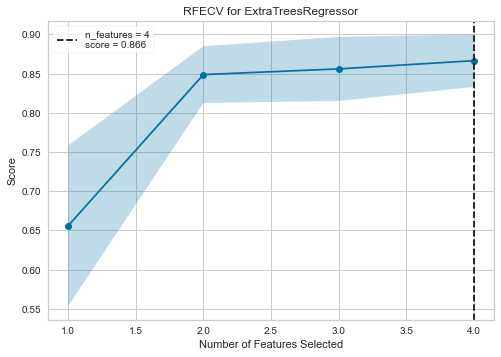

In [39]:
# Recursive Feature Selection 

plot_model(et, 'rfe')

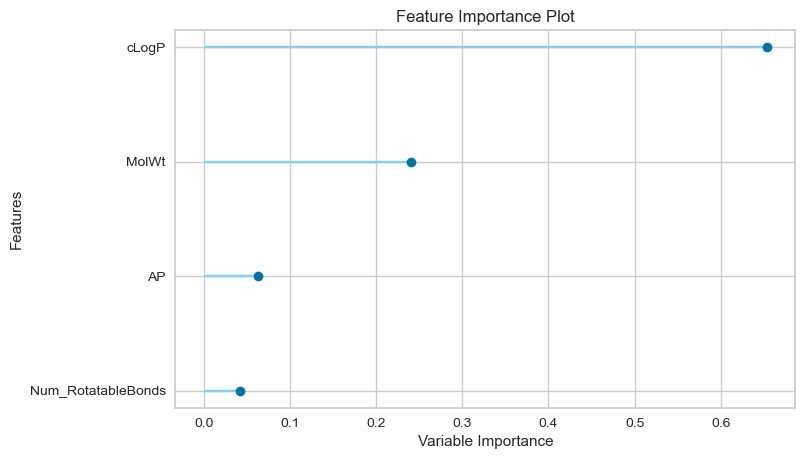

In [40]:
# Feature selection plot

plot_model(et, 'feature')

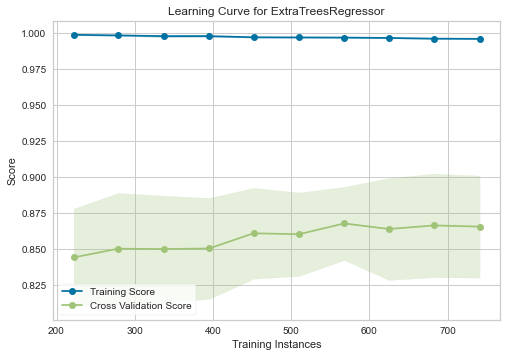

In [41]:
# Learning Curve

plot_model(et, 'learning')

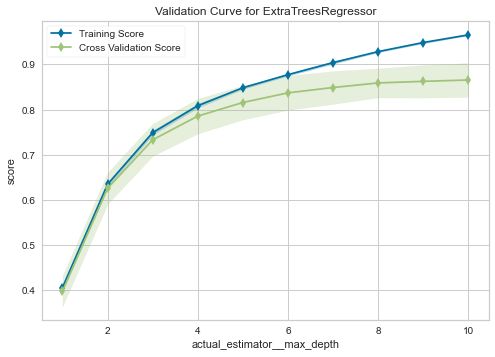

In [43]:
# Validation curve

plot_model(et, 'vc')

In [45]:
# Model Hyperparameters

plot_model(et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


# 5.2 Evaluate Model (All Plots)

In [46]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 5.3 Interpret Model

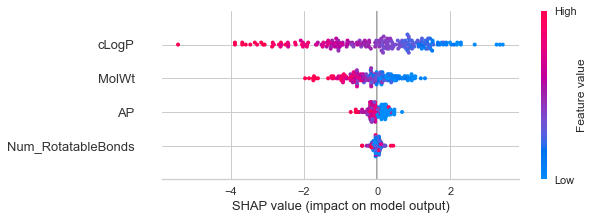

In [34]:
interpret_model(et)

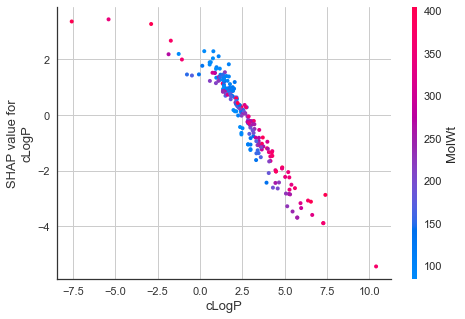

In [35]:
interpret_model(et, plot='correlation')

In [36]:
interpret_model(et, plot='reason', observation=1)

# 6.0 Prediction on hold-out/test data

In [47]:
prediction = predict_model(et)
prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5099,0.4965,0.7046,0.8827,0.1835,0.2555


,cLogP,MolWt,Num_RotatableBonds,AP,LogS,Label
0,2.83260,112.216003,0.0,0.00,-4.47,-4.300000
1,5.96720,291.992004,1.0,0.75,-7.28,-6.920000
2,5.02420,338.876007,0.0,0.00,-5.64,-5.531190
3,0.86820,137.138000,1.0,0.60,-0.46,-1.706733
4,1.90322,137.138000,1.0,0.60,-2.49,-2.385000


# 7.0 Finalize model (fit the entire dataset) and make predictions

In [49]:
final_et = finalize_model(et)

In [50]:
predict_final_et = predict_model(final_et)
predict_final_et.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0442,0.0152,0.1231,0.9964,0.0377,0.0243


,cLogP,MolWt,Num_RotatableBonds,AP,LogS,Label
0,2.83260,112.216003,0.0,0.00,-4.47,-4.385
1,5.96720,291.992004,1.0,0.75,-7.28,-6.992
2,5.02420,338.876007,0.0,0.00,-5.64,-5.640
3,0.86820,137.138000,1.0,0.60,-0.46,-0.460
4,1.90322,137.138000,1.0,0.60,-2.49,-2.420


# 8.0 Predictions on Unseen Data using finalized model

In [52]:
unseen_predictions = predict_model(final_et, data=data_unseen)
unseen_predictions.head()

,cLogP,MolWt,Num_RotatableBonds,AP,LogS,Label
0,2.5938,167.850,1.0,0.000000,-1.74,-2.509690
1,2.0289,133.405,1.0,0.000000,-1.48,-1.728863
2,4.3002,215.894,0.0,0.600000,-4.57,-5.095000
3,3.9741,314.802,0.0,0.666667,-4.50,-5.600000
4,3.6468,181.449,0.0,0.666667,-3.59,-4.240000


## 8.1. Check evaluation metric (R2) on unseen data

In [53]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.LogS, unseen_predictions.Label, 'R2')

0.8777

# 9.0 Save Model

In [54]:
save_model(final_et, 'ExtraTreeRegressor 24Dec2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='LogS',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='m...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                    